In [1]:
%matplotlib notebook

import numpy as np
import cv2
from glob import glob
from PIL import Image
from ipywidgets import interact, fixed, IntSlider
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
def show_images(images):
    fig = plt.figure()
    for i in range(len(images)):
        img = images[i]
        a = fig.add_subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=(None if len(img.shape) == 3 else 'gray'))
        #plt.axis('off')
    plt.show()

def show_rgb(img):
    show_images([img])
    
def show_hsv(images):
    show_images(cv2.cvtColor(img, cv2.COLOR_HSV2RGB) for img in images)

def show_gray(images):
    show_images(images)

In [ ]:
chess_shape = (9, 6)
objpoints = []
imgpoints = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)
for path in glob('camera_cal/*'):
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chess_shape, None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

for path in islice(glob('camera_cal/*'), 2):
    img = cv2.imread(path)
    dst = undistort(img)
    show_images([img, dst])

In [ ]:
src = np.float32([
        [253, 685],
        [572, 465],
        [709, 465],
        [1052, 685]])

dst = np.float32([
        [500, 750],
        [500, 300],
        [700, 300],
        [700, 750]])

M = cv2.getPerspectiveTransform(src, dst)

def get_road(img):
    img_size = (img.shape[1], img.shape[0])
    # we mostly are interested in upscaling and CUBIC seems to be quite good
    # http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_CUBIC)
    
for i in islice(glob('test_images2/*'), 2):
    img = np.asarray(Image.open(i))
    road = get_road(img)
    show_images([img, road])


In [ ]:
#points = np.random.random((10, 2))
pp = []
for p in [[5, 1], [4, 3], [4.5, 2.5], [4.7, 2.3], [3.9, 2]]:
    for i in range(10):
        pp.append([p[0]+np.random.random()*0.4, p[1]+np.random.random()*0.4])
        
points = np.array(pp)

x = points[:, 0]
y = points[:, 1]

residuals, rank, singular_values, rcond, pre = np.polyfit(y, x, 10, full=True)
print("residuals: %s" % residuals)
print("rank: %s" % rank)
print("singular_values: %s" % singular_values)
print("rcond: %s" % rcond)
print("pre: %s" % pre)

f = np.poly1d(residuals, variable='y')
print(f)

y_new = np.linspace(min(y), max(y), 50)
x_new = f(y_new)

plt.figure()
plt.margins(0.1, 0.1)
plt.plot(x, y, '.', x_new, y_new)
plt.show()

<IPython.core.display.Javascript object>


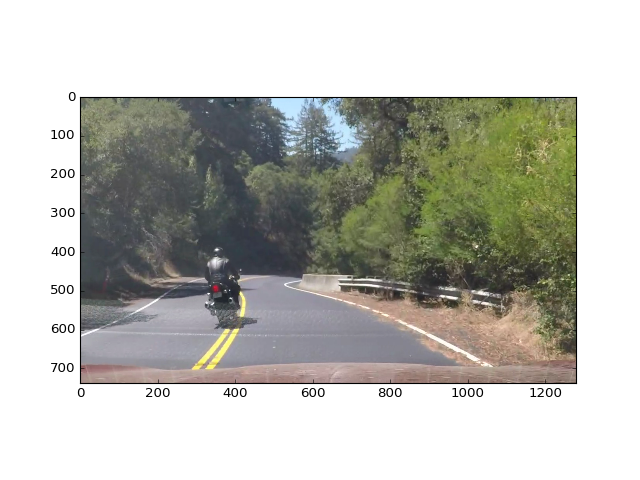

<IPython.core.display.Javascript object>


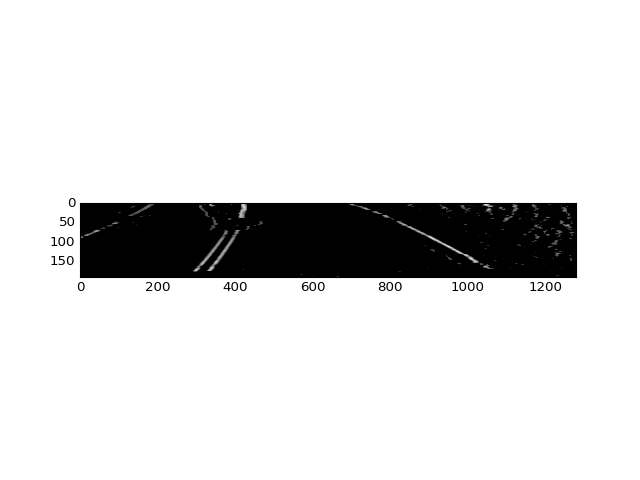

[[186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], [321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336], [388, 389], [414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429], [676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690], [834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847], [891, 892, 893], [932, 933, 934], [990, 991, 992, 993, 994, 995, 996, 997], [1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029], [1089, 1090, 1091, 1092, 1093], [1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136], [1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177]]


<IPython.core.display.Javascript object>


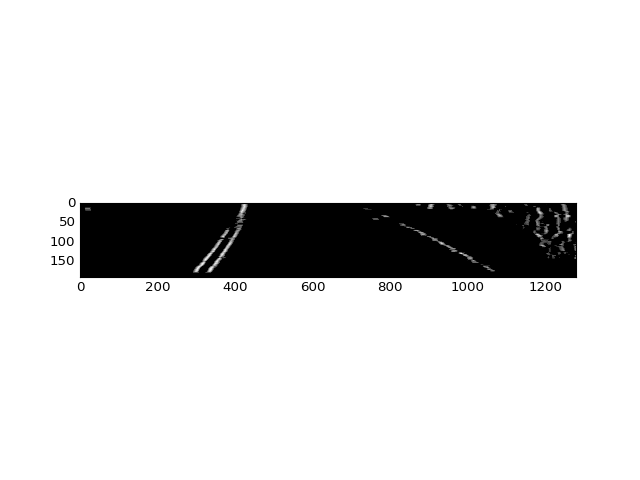

[[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429], [674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689], [940, 941, 942, 943, 944, 945, 946], [971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988], [1058, 1059, 1060, 1061], [1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078], [1088, 1089], [1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152], [1169, 1170, 1171, 1172, 1173, 1174, 1175], [1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206], [1228, 1229, 1230, 1231], [1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249]]


<IPython.core.display.Javascript object>


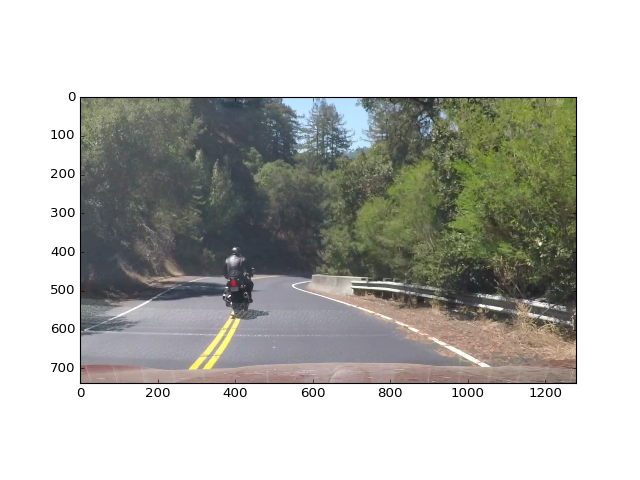

<IPython.core.display.Javascript object>


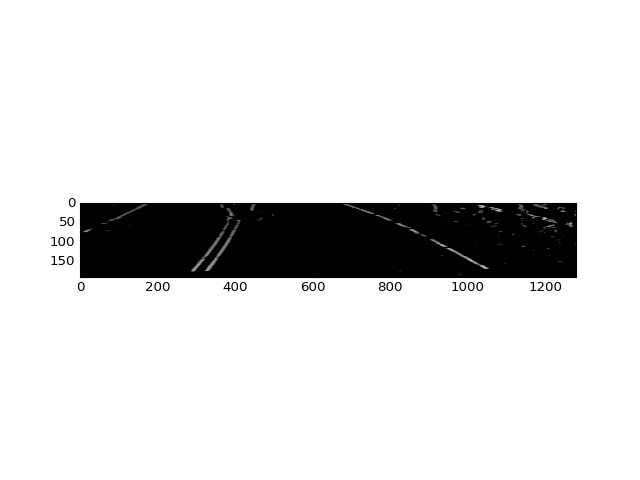

[[67, 68, 69, 70, 71, 72, 73, 74, 75, 76], [167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182], [359, 360, 361, 362, 363, 364, 365, 366], [450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460], [659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673], [735, 736, 737, 738, 739, 740], [853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864], [908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918], [966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978], [1116, 1117, 1118, 1119, 1120, 1121], [1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152], [1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181]]


<IPython.core.display.Javascript object>


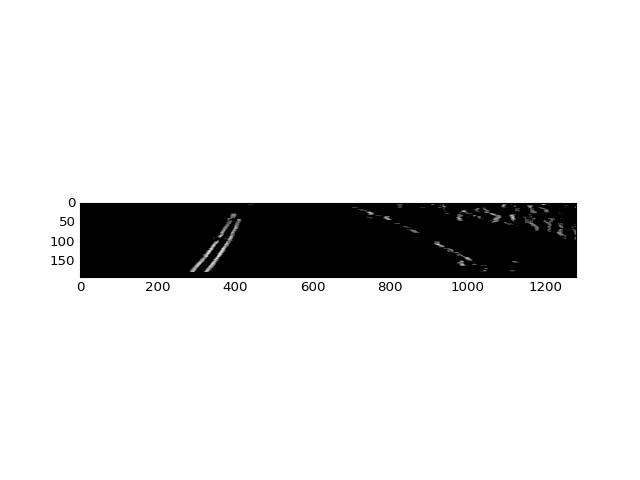

[[817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831], [898, 899], [901, 902, 903, 904, 905, 906, 907, 908, 909, 910], [925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937], [1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100], [1103, 1104, 1105, 1106, 1107, 1108], [1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198]]


<IPython.core.display.Javascript object>


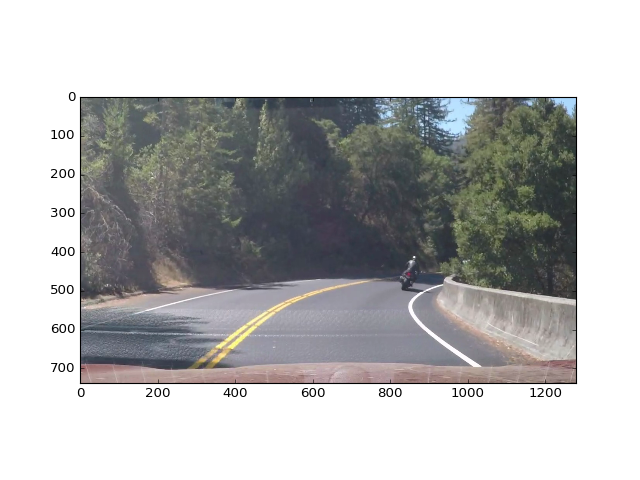

<IPython.core.display.Javascript object>


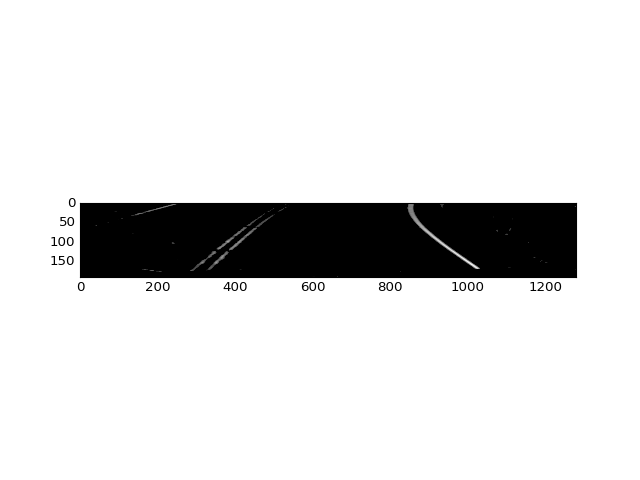

[[33, 34], [257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270], [848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863], [925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936], [979, 980, 981, 982, 983, 984]]


<IPython.core.display.Javascript object>


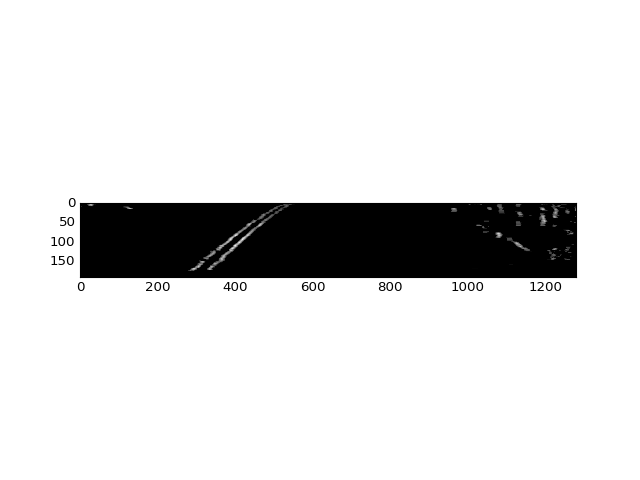

[[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559], [993, 994, 995], [1034, 1035, 1036, 1037, 1038, 1039, 1040], [1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085], [1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135], [1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198]]


In [24]:
def find_lane_yellow_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,v]
    mask = np.zeros_like(h)
    mask[(h > 15) & (h <= 31)] = 1
    return mask
    
def find_lane_gray_mask(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = np.zeros_like(gray)
    mask[gray >= 225] = 1
    return mask

def find_bright_lanes(gray_img):
    line_width = 20
    
    # -1, ..., -1, 1, ..., 1, -1, ..., -1
    kernel = np.concatenate((np.repeat(-1, line_width / 2), 
                             np.repeat(1, line_width), 
                             np.repeat(-1, line_width / 2)))

    # to stay within 0..1 even at most obvious lane pixels
    kernel = kernel / np.sum(np.abs(kernel))
    
    vertical_offset = 20
    window_height = 190
    frame = gray_img[-1 - vertical_offset - window_height : -1 - vertical_offset]
    
    g_min = np.min(frame)
    g_max = np.max(frame)
    gray = (frame - g_min) * (1. / (g_max - g_min))

    conv = cv2.filter2D(frame, -1, kernel.reshape(1, -1))
    c_max = np.max(conv)
    conv[conv < c_max * 0.2] = 0
    
    for line in conv:
        lines = []
        current_line = None
        for o in range(frame.shape[1]):
            if line[o] > 0:
                if current_line == None:
                    current_line = []
                current_line.append(o)
            elif current_line != None:
                #if line_width - 5 < len(current_line) < line_width + 5:
                lines.append(current_line)
                current_line = None
            
        break
        
    show_images([conv])
    print(lines)
    
    

def find_lanes(img):
    show_images([img])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    find_bright_lanes(gray)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]
    #yellow = np.copy(h)
    yellow = h
    yellow[(h < 18) | (h > 30)] = 0
    find_bright_lanes(yellow)

    
for i in islice(glob('test_images2/*'), 3):
    img = np.array(Image.open(i))
    find_lanes(img)


<IPython.core.display.Javascript object>


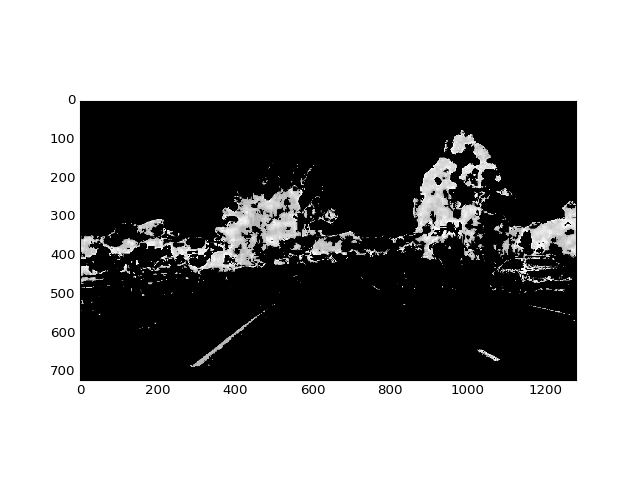

In [10]:
img = np.array(Image.open('test_images/test1.jpg'))
    
@interact(img = fixed(img), lh = IntSlider(min=0, max=255, value=15), hh = IntSlider(min=0, max=255, value=31))
def show_hue(img, lh, hh):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    h[(h < lh) | (h > hh)] = 0
    #show_images([img])
    plt.figure()
    plt.imshow(h, cmap = 'gray')
    plt.show()
    


In [ ]:
for i in islice(glob('test_images2/*'), 8):
    img = np.array(Image.open(i))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.blur(gray, ksize=(3, 3))
    contours = cv2.findContours(gray, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    print(contours)
    for j in range(len(contours)):
        cv2.drawContours(img, np.array(contours), j, [255, 0, 0])

In [ ]:
@interact(x=(0, 20))
def update_image(x):
    img = np.asarray(Image.open(i))
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(img, mask, (345, 647), (255, 0, 0), (x, x, x), (x, x, x))
    plt.imshow(img)